In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add your project root or any custom path
sys.path.append(os.path.abspath("/home/miza/Magisterka"))


In [2]:
from src.model.dataloader import Dataloader
data = Dataloader()
df= data.data
df_gpt = pd.read_csv('/home/miza/Magisterka/src/data/annotations/gpt_generated_data8classes.csv')
balanced_df_gpt = data.balance_gpt_data(df_gpt)

/home/miza/Magisterka/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


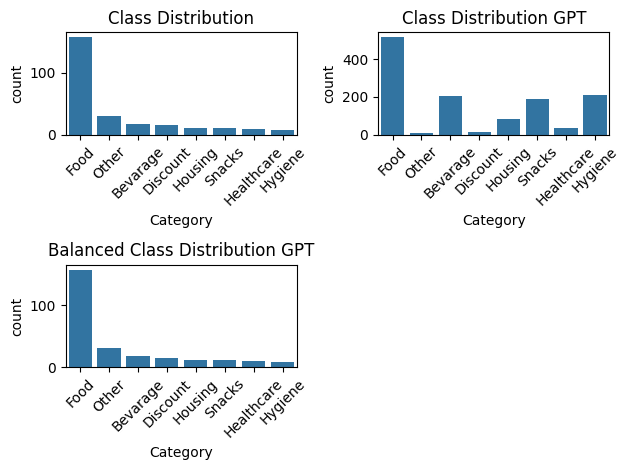

In [ ]:
category_order = df['category'].value_counts().index.tolist()

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='category',order=category_order)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplot(2, 2, 2)
sns.countplot(data=df_gpt, x='category',order=category_order)
plt.title("Class Distribution GPT")
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplot(2, 2, 3)
sns.countplot(data=balanced_df_gpt, x='category',order=category_order)
plt.title("Balanced Class Distribution GPT")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
train_examples

In [ ]:
from src.model.embeddings import BertEmbedding
from sklearn.manifold import TSNE
from src.utils.utils import preprocess_text
from sklearn.preprocessing import StandardScaler
train,test = data.get_training_ready_data()
embedding = BertEmbedding()
data_preprocessed = data.get_preprocessed_data()
model = embedding.finetune_mini(data_preprocessed)

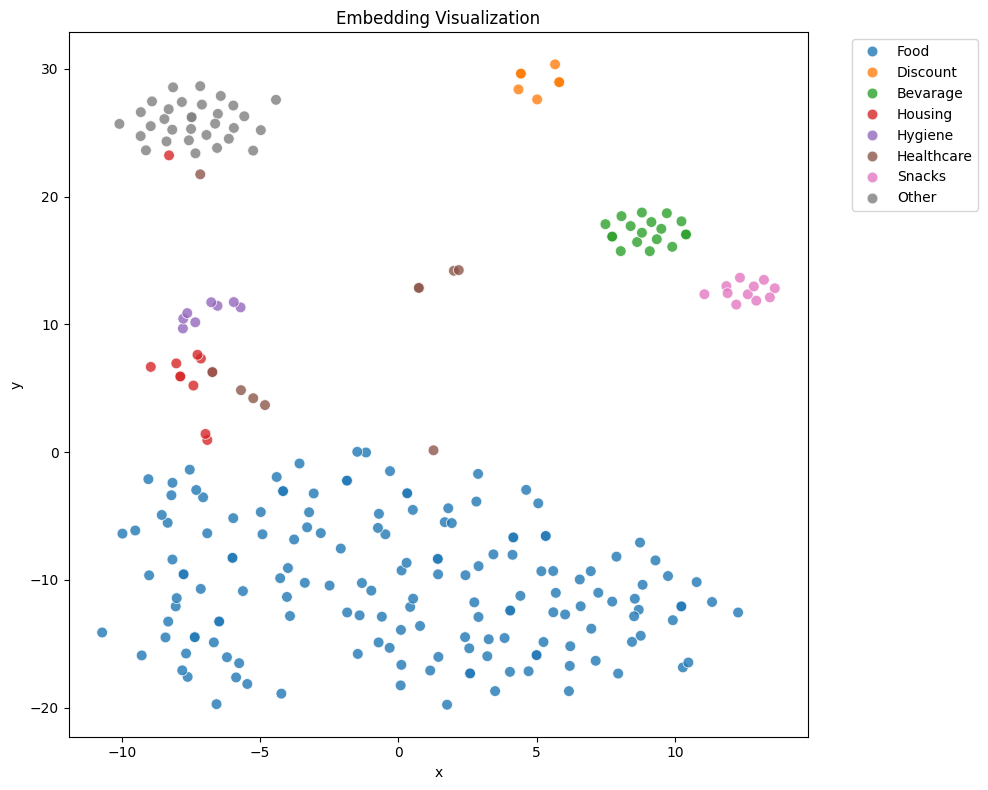

In [ ]:

df['Text'] = df['OCR_product'].apply(preprocess_text)
#embeddings = embedding.embed(df['Text'].tolist())
#embeddings = embedding.embed_with_mini(df['Text'].tolist())
embeddings = embedding.embed_with_given_model(model, df['Text'].tolist())
embeddings_scaled = StandardScaler().fit_transform(embeddings)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings)
df_plot = pd.DataFrame(embeddings_2d, columns=["x", "y"])
df_plot['label'] = df['category']

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_plot, x='x', y='y', hue='label', palette='tab10', s=60, alpha=0.8)
plt.title("Embedding Visualization")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

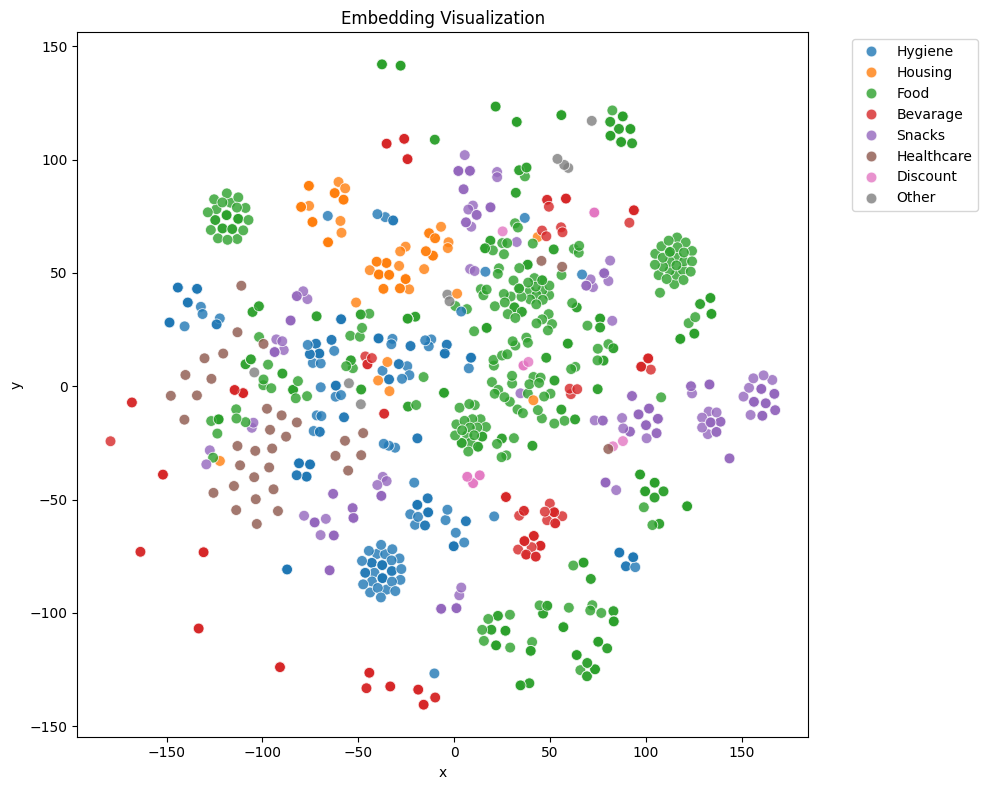

In [ ]:
embedding = BertEmbedding()
df_gpt['Text'] = df_gpt['OCR_product'].apply(preprocess_text)
embeddings = embedding.embed(df_gpt['Text'].tolist())
embeddings_scaled = StandardScaler().fit_transform(embeddings)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings)
df_plot = pd.DataFrame(embeddings_2d, columns=["x", "y"])
df_plot['label'] = df_gpt['category']

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_plot, x='x', y='y', hue='label', palette='tab10', s=60, alpha=0.8)
plt.title("Embedding Visualization")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()